<a href="https://colab.research.google.com/github/parthabathia/GoldPricePrediction/blob/main/GoldPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
gold_dataset = pd.read_csv('/content/gold.csv')

In [ ]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
correlation = gold_dataset.corr()

<ipython-input-6-a17bf32cf03a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_dataset.corr()


<Axes: >

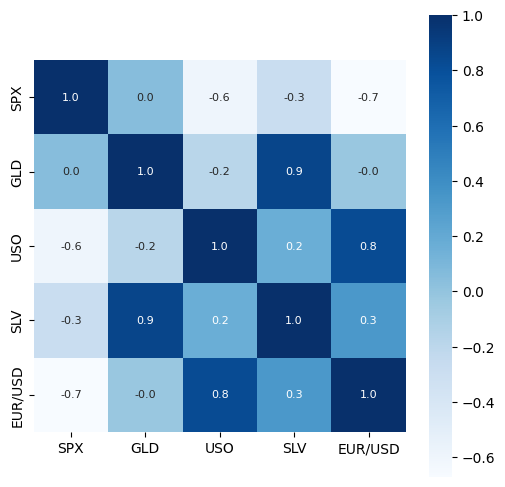

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation, cbar=True, square=True, annot=True, annot_kws={'size':8}, fmt='0.1f', cmap='Blues')

<ipython-input-13-9ab3fe21dcf0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_dataset['GLD'], color='yellow')


<Axes: xlabel='GLD', ylabel='Density'>

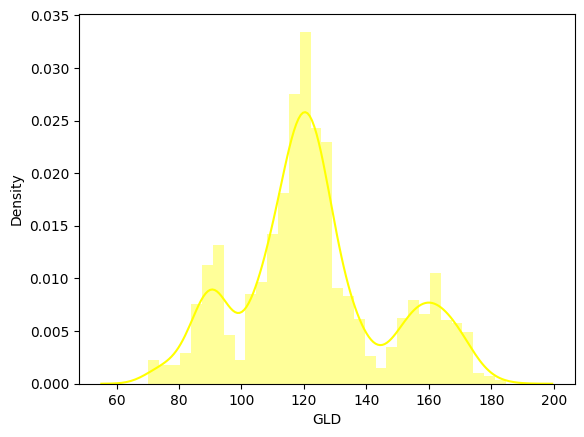

In [ ]:
sns.distplot(gold_dataset['GLD'], color='yellow')

In [ ]:
X = gold_dataset.drop(['Date', 'GLD'], axis=1)

In [ ]:
Y = gold_dataset['GLD']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
model = RandomForestRegressor()

In [ ]:
model.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
X_train_prediction = model.predict(X_train)

In [ ]:
X_train_accuracy = metrics.r2_score(X_train_prediction, Y_train)
X_train_accuracy

0.9985221395300454

In [ ]:
X_test_prediction = model.predict(X_test)
X_test_accuracy = metrics.r2_score(X_test_prediction, Y_test)
X_test_accuracy

0.9889687663859359

In [ ]:
X_test_accuracy = metrics.mean_absolute_error(X_test_prediction, Y_test)
X_test_accuracy

1.3339345897379897

In [ ]:
Y_test = list(Y_test)

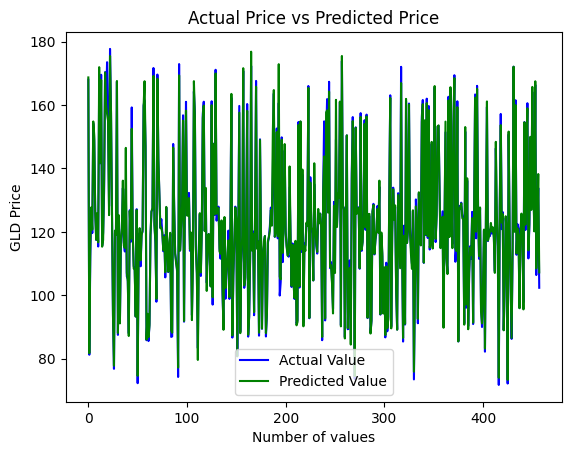

In [ ]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(X_test_prediction, color='green', label='Predicted Value')
plt.title("Actual Price vs Predicted Price")
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()